## Import Statements

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [79]:
df = pd.read_csv("QueryResults.csv")

In [80]:
print(df.head())
print(df.tail())

                     m     TagName  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                        m TagName  POSTS
1986  2020-07-01 00:00:00       r   5694
1987  2020-07-01 00:00:00      go    743
1988  2020-07-01 00:00:00    ruby    775
1989  2020-07-01 00:00:00    perl    182
1990  2020-07-01 00:00:00   swift   3607


In [81]:
df.shape

(1991, 3)

In [82]:
df.count()

m          1991
TagName    1991
POSTS      1991
dtype: int64

In [86]:
print(df["TagName"].max())
df.groupby("TagName").sum()

swift


<ipython-input-86-faec7f72cfde>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TagName").sum()


,POSTS
TagName,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [84]:
df.groupby("TagName").count()

,m,POSTS
TagName,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [87]:
df["m"][1]

'2008-08-01 00:00:00'

In [88]:
type(df["m"][1])

str

In [89]:
df.m = pd.to_datetime(df.m)

## Data Manipulation



In [90]:
reshaped_df = df.pivot(index='m', columns='TagName', values='POSTS')
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [91]:
reshaped_df.shape

(145, 14)

In [92]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [95]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [94]:
reshaped_df.count()

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [96]:
reshaped_df.fillna(0, inplace=True)

In [103]:
print(reshaped_df.head())
reshaped_df.isna().values.any()

TagName     assembly      c      c#    c++  delphi   go    java  javascript  \
m                                                                             
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   85.0   511.0  164.0    14.0  0.0   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0  0.0  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0  0.0  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0  0.0   958.0       579.0   

TagName      perl    php  python    r   ruby  swift  
m                                                    
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  161.0   124.0  0.0   73.0    0.0  
2008-09-01  131.0  482.0   542.0  6.0  290.0    0.0  
2008-10-01  127.0  617.0   510.0  0.0  249.0    0.0  
2008-11-01   97.0  504.0   452.0  1.0  160.0    0.0  


False

## Data Visualisaton with with Matplotlib


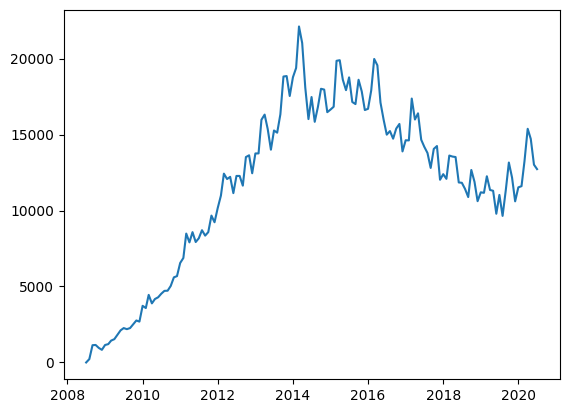

In [105]:
plt.plot(reshaped_df.index, reshaped_df.java)

(0.0, 35000.0)

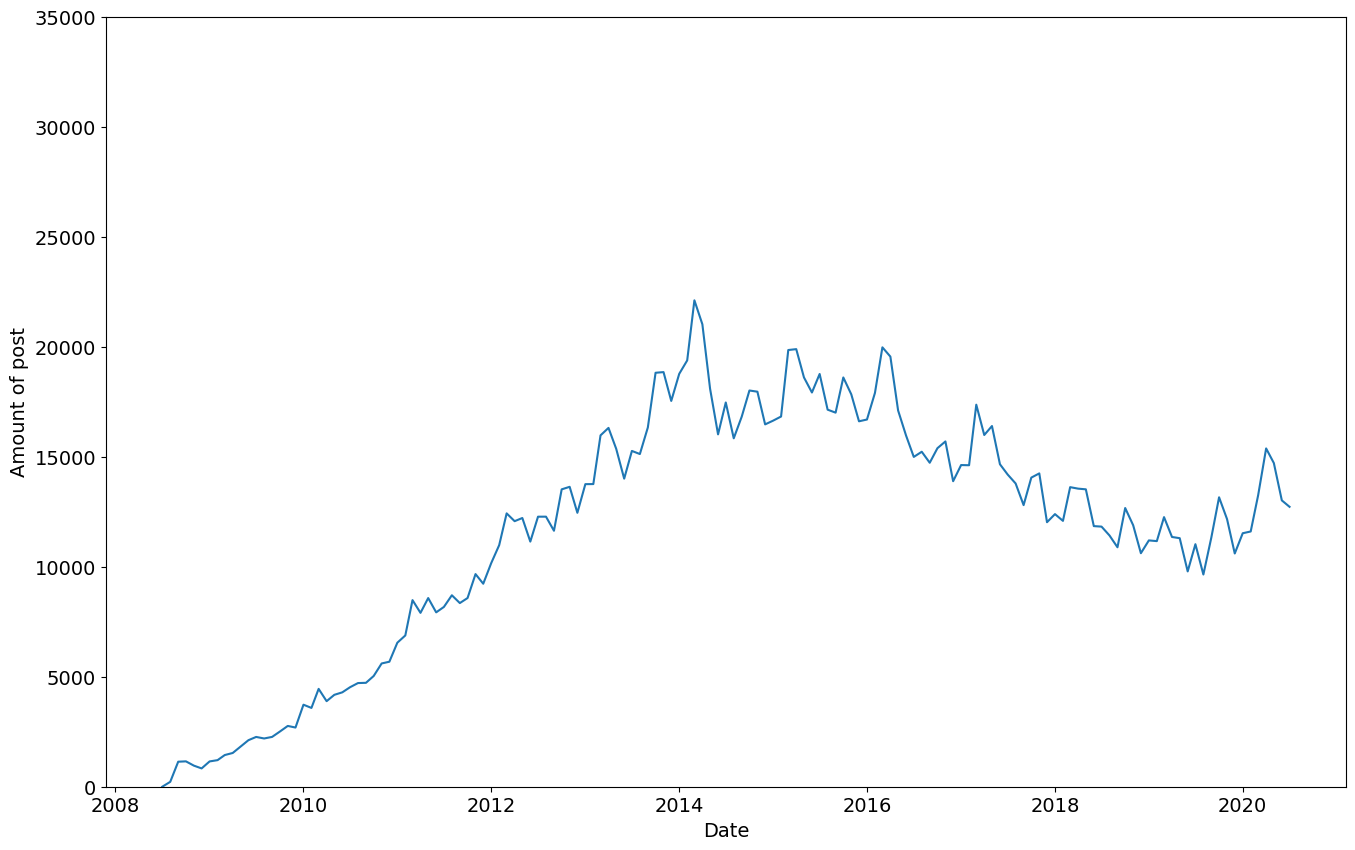

In [110]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of post", fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.ylim(0, 35000)

(0.0, 35000.0)

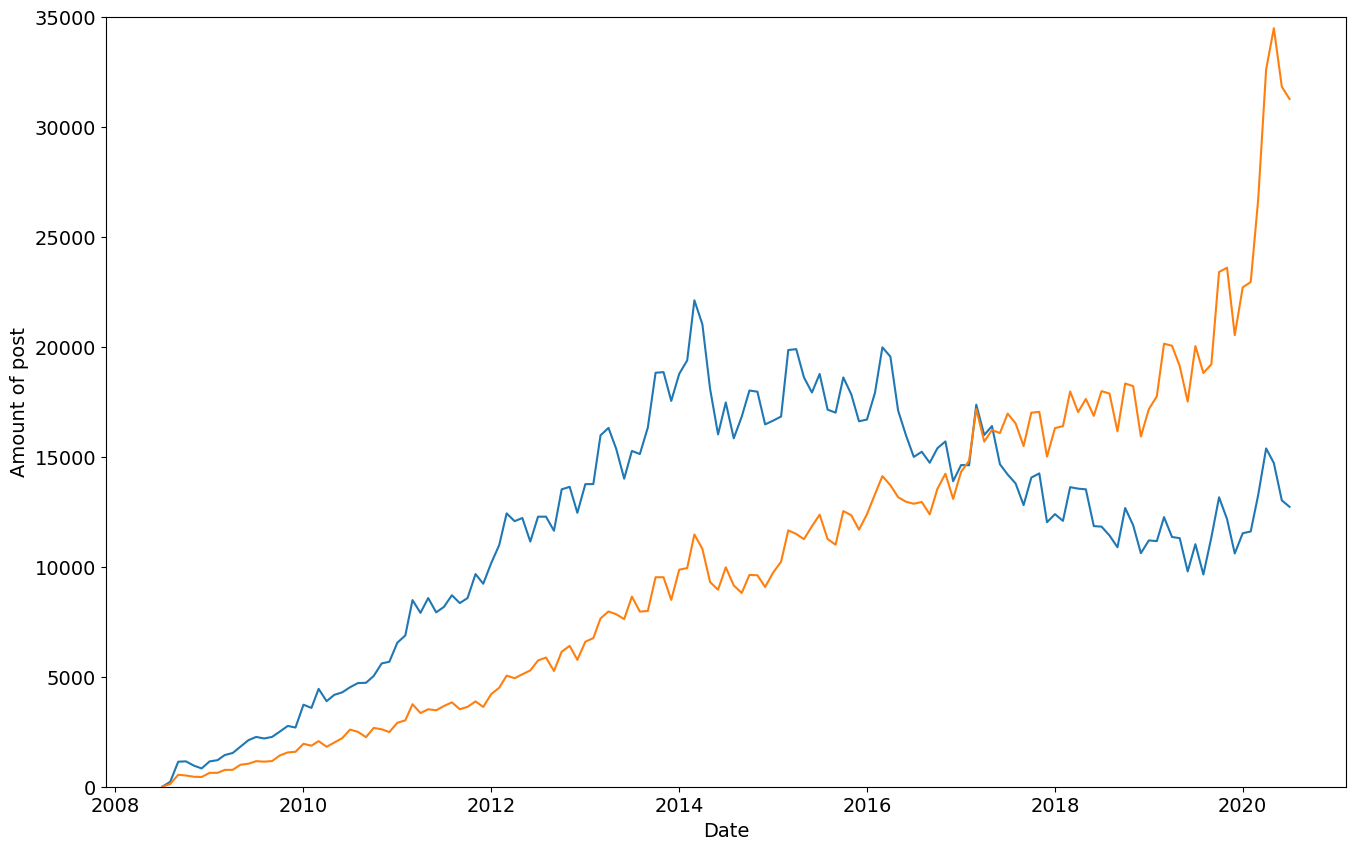

In [111]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of post", fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.ylim(0, 35000)

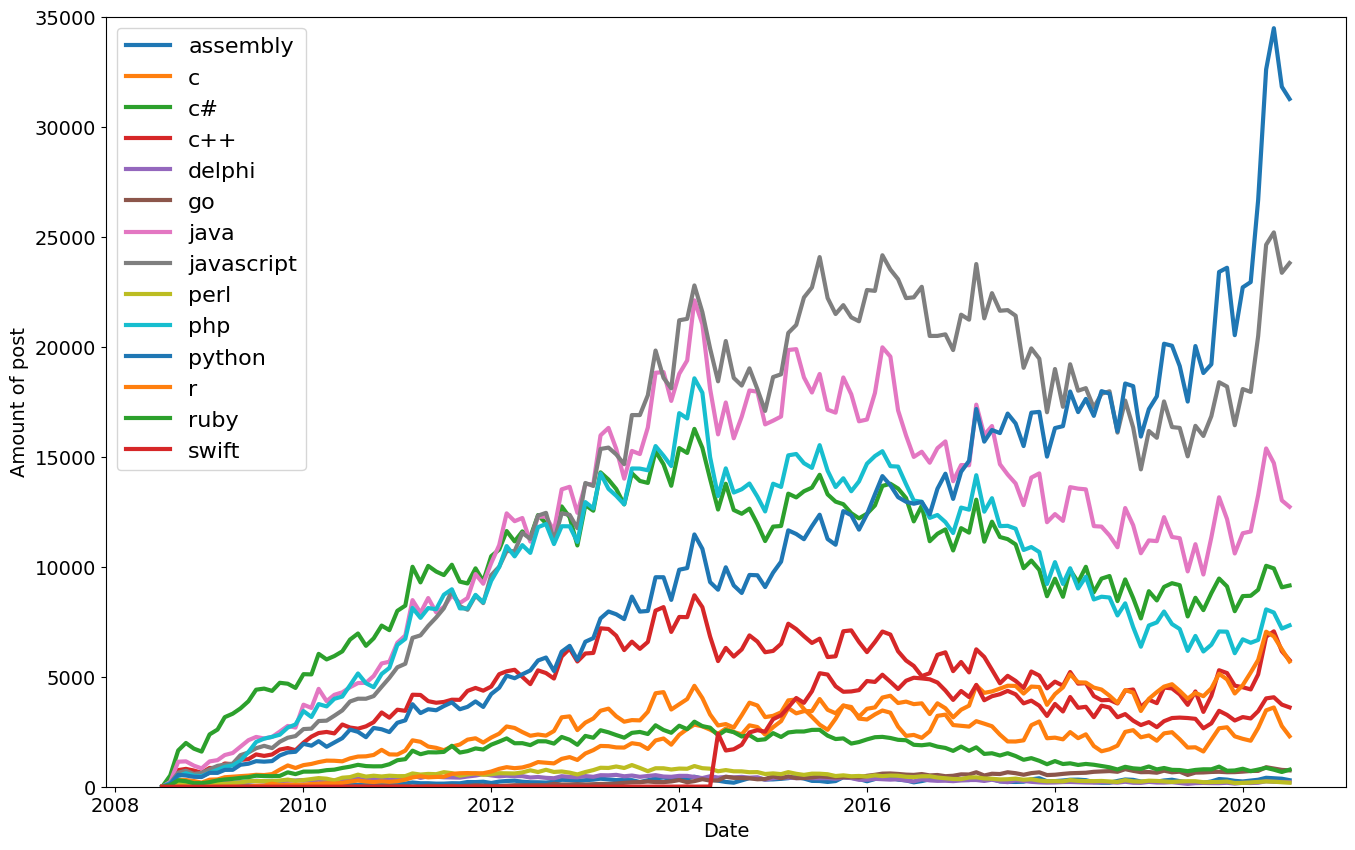

In [115]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of post", fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
  linewidth=3 , label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

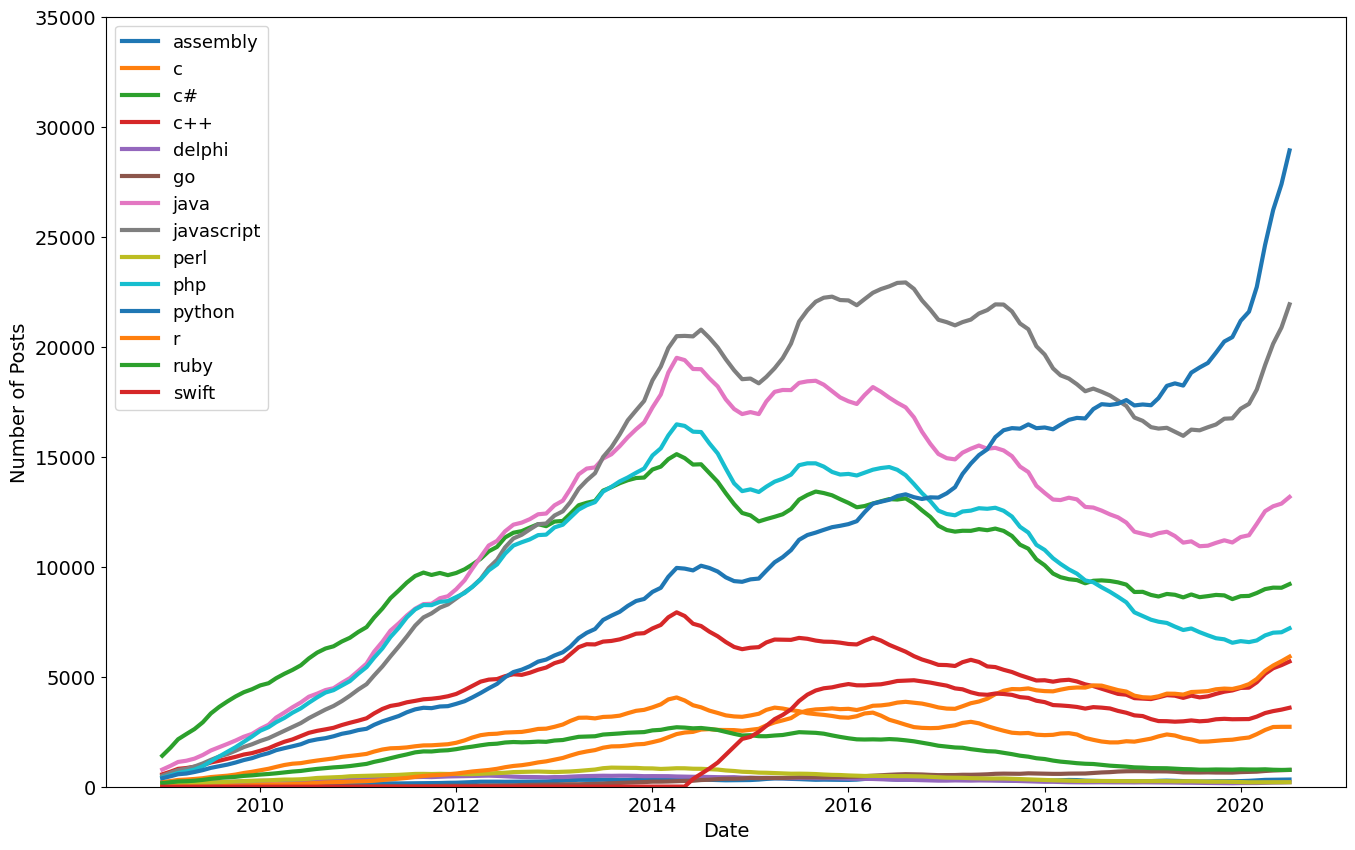

In [120]:
roll_df = reshaped_df.rolling(window=7).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=13)